In [1]:
#import pandas and nump libs
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#import data visualization lib matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#set a whitegrid style
sns.set_style('whitegrid')

#show graphics in jupyter notebook
%matplotlib inline

In [21]:
#import datareader module to grab financial data from yahoo later
from pandas_datareader import data, wb

#import datetime module to set start and end time later
from datetime import datetime

In [4]:
#write this in case you are running python2
from __future__ import division

In [5]:
#Find tickers for the largest ten private Chinese companies listed in the US 
#url= https://www.uscc.gov/sites/default/files/Chinese%20Companies%20on%20U.S.%20Stock%20Exchanges.pdf
#CTRP is excluded as yahoo finance doesn't have data for it
chinese_stock =['BABA','BIDU','JD','PDD','NTES','IQ','TAL','ZTO','WB']

In [6]:
#Use datetime module to set start and end time
end = datetime.now()

start = datetime(end.year-1, end.month,end.day)

In [7]:
#Use global variables to set the string name of a ticker as the dataframe name
for stock in chinese_stock:
    globals()[stock] = data.DataReader(stock,start=start,
                                       end=end,
                                       data_source='yahoo')

In [8]:
#Take a test
BABA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-26,188.740005,185.509995,187.880005,187.089996,9421100,187.089996
2019-04-29,188.000000,185.759995,187.419998,186.940002,8660600,186.940002
2019-04-30,188.250000,183.820007,186.300003,185.570007,15076500,185.570007
2019-05-01,193.195007,185.880005,186.750000,189.309998,17397500,189.309998
2019-05-02,192.699997,186.649994,189.419998,190.389999,11468100,190.389999
...,...,...,...,...,...,...
2020-04-20,216.100006,209.360001,209.869995,212.130005,19295400,212.130005
2020-04-21,212.130005,205.029999,209.899994,207.339996,14107600,207.339996
2020-04-22,212.000000,209.210007,212.000000,209.960007,13486100,209.960007


In [9]:
#Grab the basic features of the BABA dataframe 
BABA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,188.336345,183.918591,186.269738,186.167540,1.700085e+07,186.167540
std,20.278283,20.077149,20.152820,20.284857,6.981243e+06,20.284857
min,150.679993,147.949997,149.600006,149.259995,5.523000e+06,149.259995
25%,173.802505,169.194996,171.445000,170.759995,1.189210e+07,170.759995
50%,183.199997,178.300003,180.779999,180.000000,1.576455e+07,180.000000
75%,207.322498,201.447498,204.815002,204.940002,2.046978e+07,204.940002
max,231.139999,227.039993,230.050003,230.479996,5.183230e+07,230.479996


In [10]:
#Grab general info of BABA dataframe
BABA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-04-26 to 2020-04-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


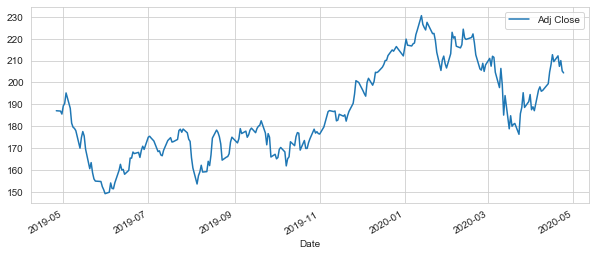

In [11]:
#Plot BABA's closing prices in the past year 
BABA['Adj Close'].plot(legend=True, figsize=(10,4))

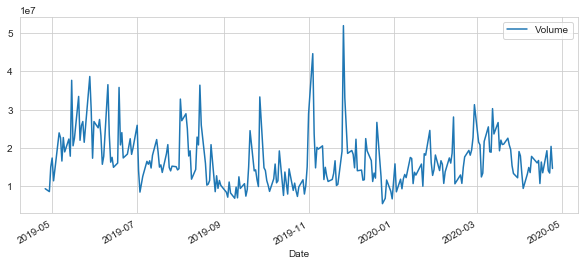

In [12]:
BABA['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
#Calculate moving average(MA) of BABA in 10, 20 and 50 days
ma_day = [10,20,50]

#Create new columns to store MA data
for ma in ma_day:
    
    column_name = 'MA for {} days' .format(ma)
    
    BABA[column_name] = BABA['Adj Close'].rolling(ma).mean()
    

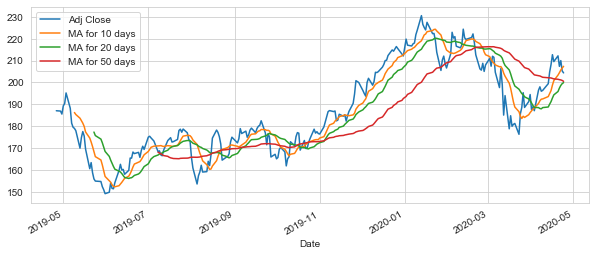

In [14]:
#Plot MA
BABA[['Adj Close','MA for 10 days','MA for 20 days',
      'MA for 50 days']].plot(figsize=(10,4))

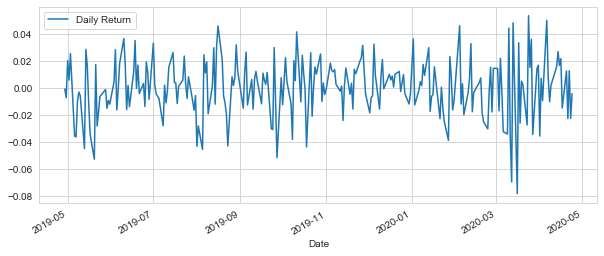

In [15]:
#Calculate daily return by using percentage change of Adj Close
#Pandas has a built-in function of pct_change
BABA['Daily Return'] = BABA['Adj Close'].pct_change()
BABA['Daily Return'].plot(legend=True,figsize=(10,4))

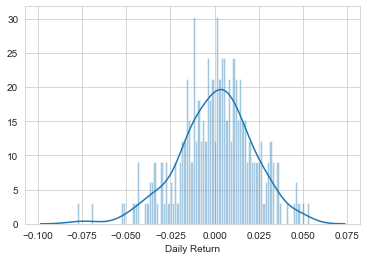

In [16]:
#Use distribution plot to combine histogram and KDE  
sns.distplot(BABA['Daily Return'].dropna(),bins=100)

In [17]:
#Build a new dataframe containing only Adj Close
closing_df = data.DataReader(chinese_stock,start=start,end=end,
                             data_source='yahoo')['Adj Close']
closing_df

Symbols,BABA,BIDU,JD,PDD,NTES,IQ,TAL,ZTO,WB
Date,,,,,,,,,
2019-04-26,187.089996,166.119995,29.129999,21.920000,271.296295,21.900000,38.599998,19.754185,67.739998
2019-04-29,186.940002,165.850006,29.865000,22.280001,274.118195,21.980000,38.669998,19.704727,67.750000
2019-04-30,185.570007,166.229996,30.270000,22.230000,274.968597,22.110001,38.470001,19.714619,68.500000
2019-05-01,189.309998,165.419998,30.200001,23.299999,275.780396,22.200001,38.180000,19.576132,67.940002
2019-05-02,190.389999,166.240005,29.990000,23.129999,270.977386,22.400000,39.049999,19.764078,67.110001
...,...,...,...,...,...,...,...,...,...
2020-04-20,212.130005,104.680000,45.200001,50.110001,348.829987,19.250000,50.009998,28.549999,36.259998
2020-04-21,207.339996,101.410004,43.240002,50.939999,344.399994,18.570000,50.959999,27.900000,35.459999
2020-04-22,209.960007,101.750000,44.990002,52.150002,348.670013,18.430000,50.720001,28.969999,35.939999


In [18]:
#Build a new dataframe for stocks' daily return
chinese_stock_returns = closing_df.pct_change()
chinese_stock_returns

Symbols,BABA,BIDU,JD,PDD,NTES,IQ,TAL,ZTO,WB
Date,,,,,,,,,
2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-29,-0.000802,-0.001625,0.025232,0.016423,0.010402,0.003653,0.001813,-0.002504,0.000148
2019-04-30,-0.007329,0.002291,0.013561,-0.002244,0.003102,0.005915,-0.005172,0.000502,0.011070
2019-05-01,0.020154,-0.004873,-0.002313,0.048133,0.002952,0.004071,-0.007538,-0.007025,-0.008175
2019-05-02,0.005705,0.004957,-0.006954,-0.007296,-0.017416,0.009009,0.022787,0.009601,-0.012217
...,...,...,...,...,...,...,...,...,...
2020-04-20,0.012554,-0.003048,-0.020585,0.127081,0.000545,-0.001556,-0.031940,-0.008336,-0.011720
2020-04-21,-0.022581,-0.031238,-0.043363,0.016564,-0.012700,-0.035325,0.018996,-0.022767,-0.022063
2020-04-22,0.012636,0.003353,0.040472,0.023753,0.012398,-0.007539,-0.004710,0.038351,0.013536


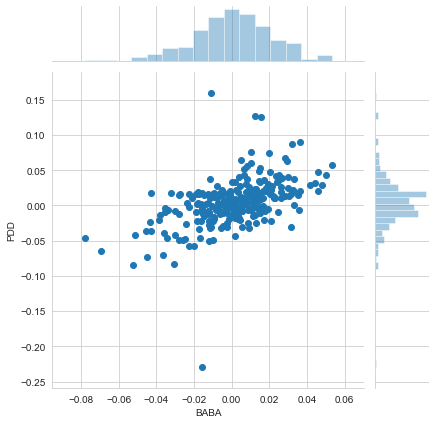

In [19]:
#Compare correlation between BABA and PDD
sns.jointplot('BABA','PDD',chinese_stock_returns,kind='scatter')

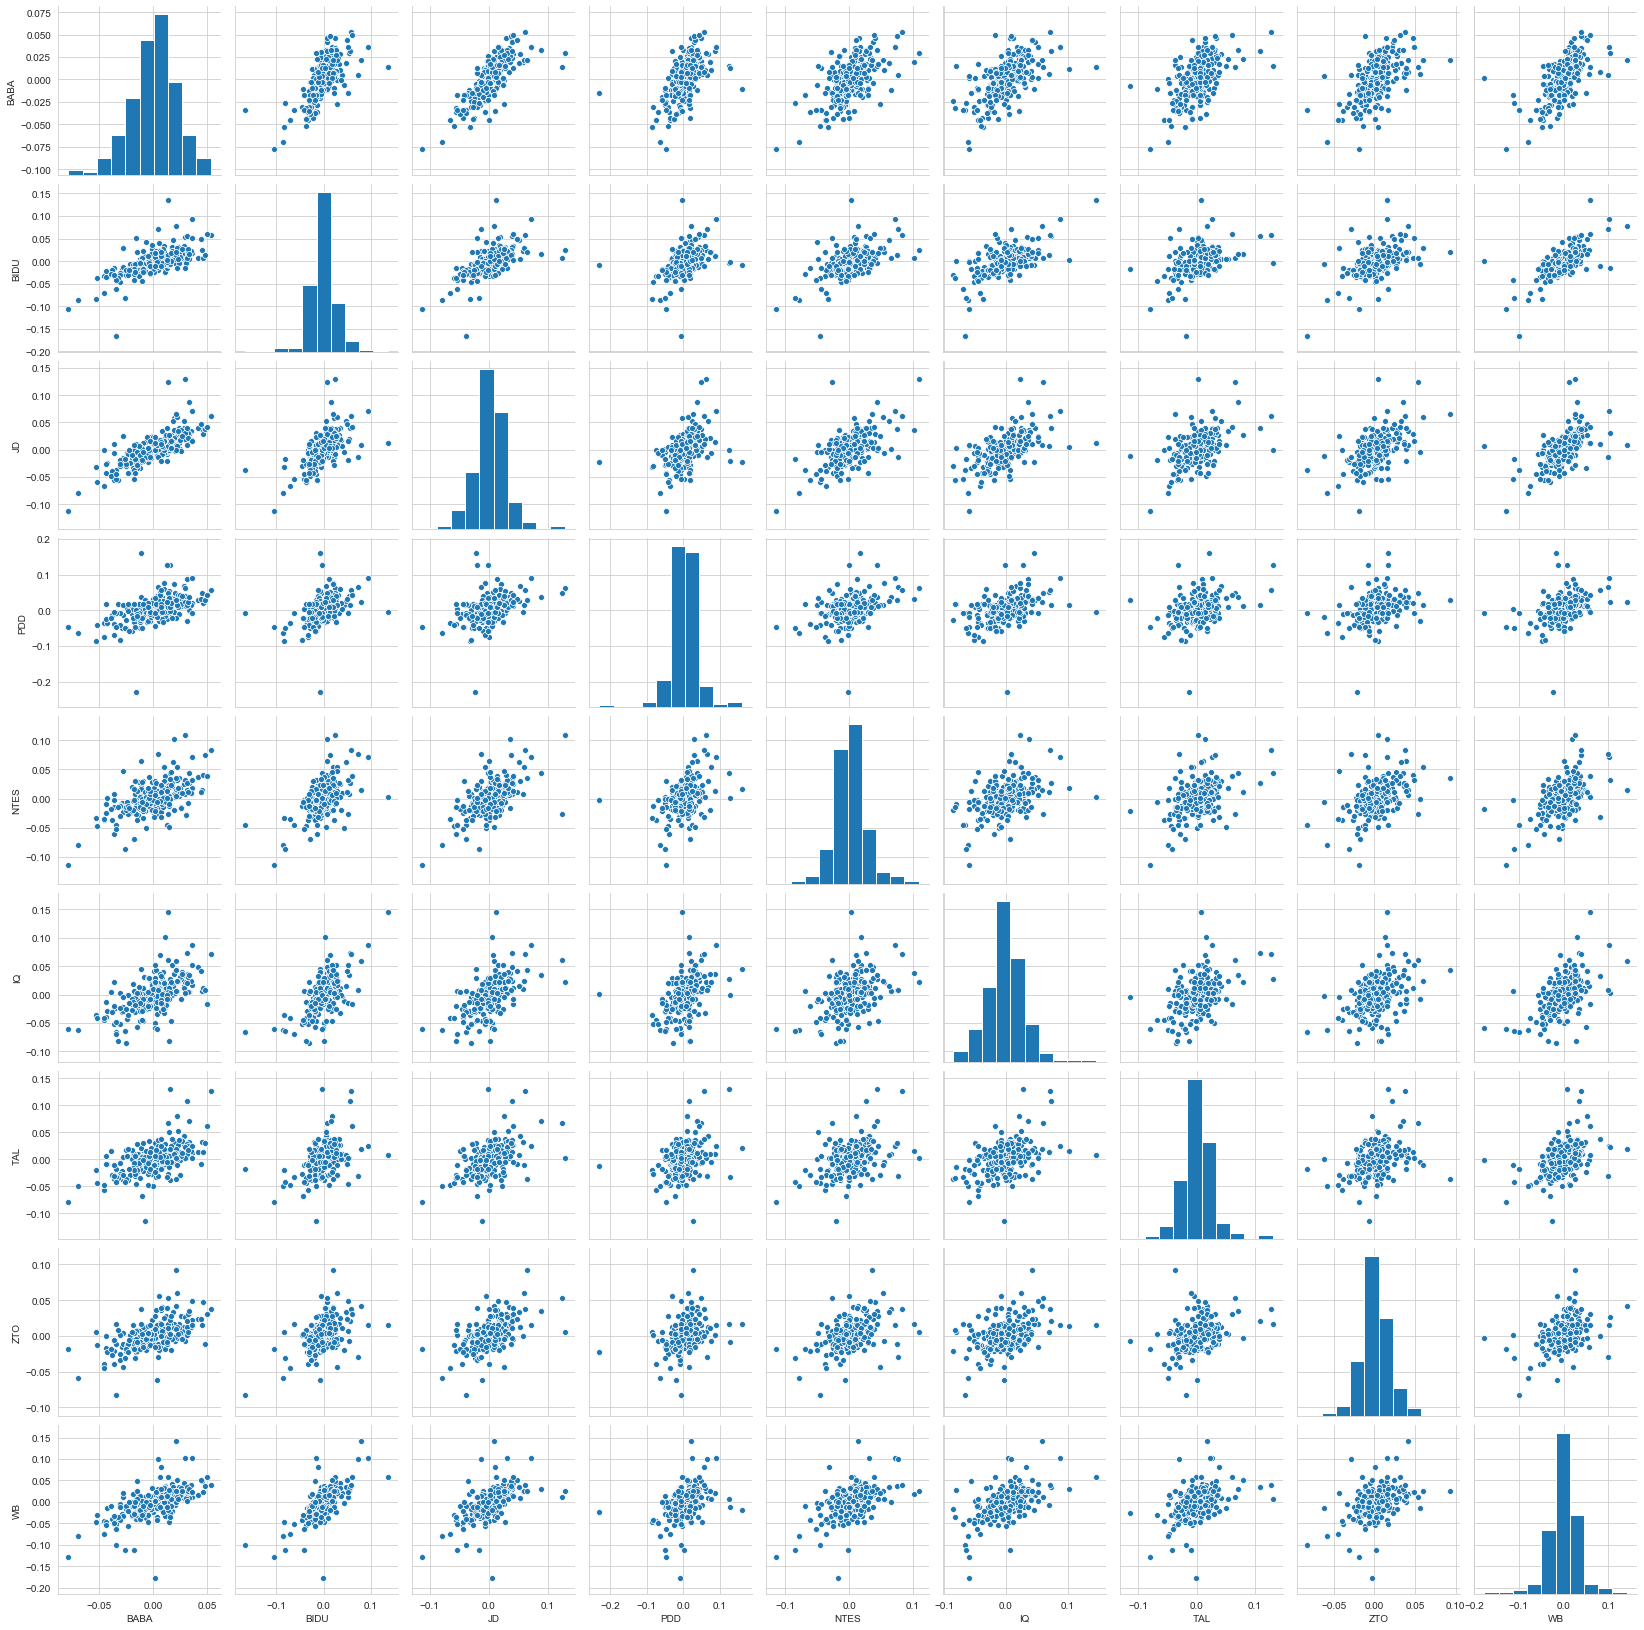

In [22]:
#Plot pairplot to show correlations between each pairs
sns.pairplot(chinese_stock_returns.dropna())

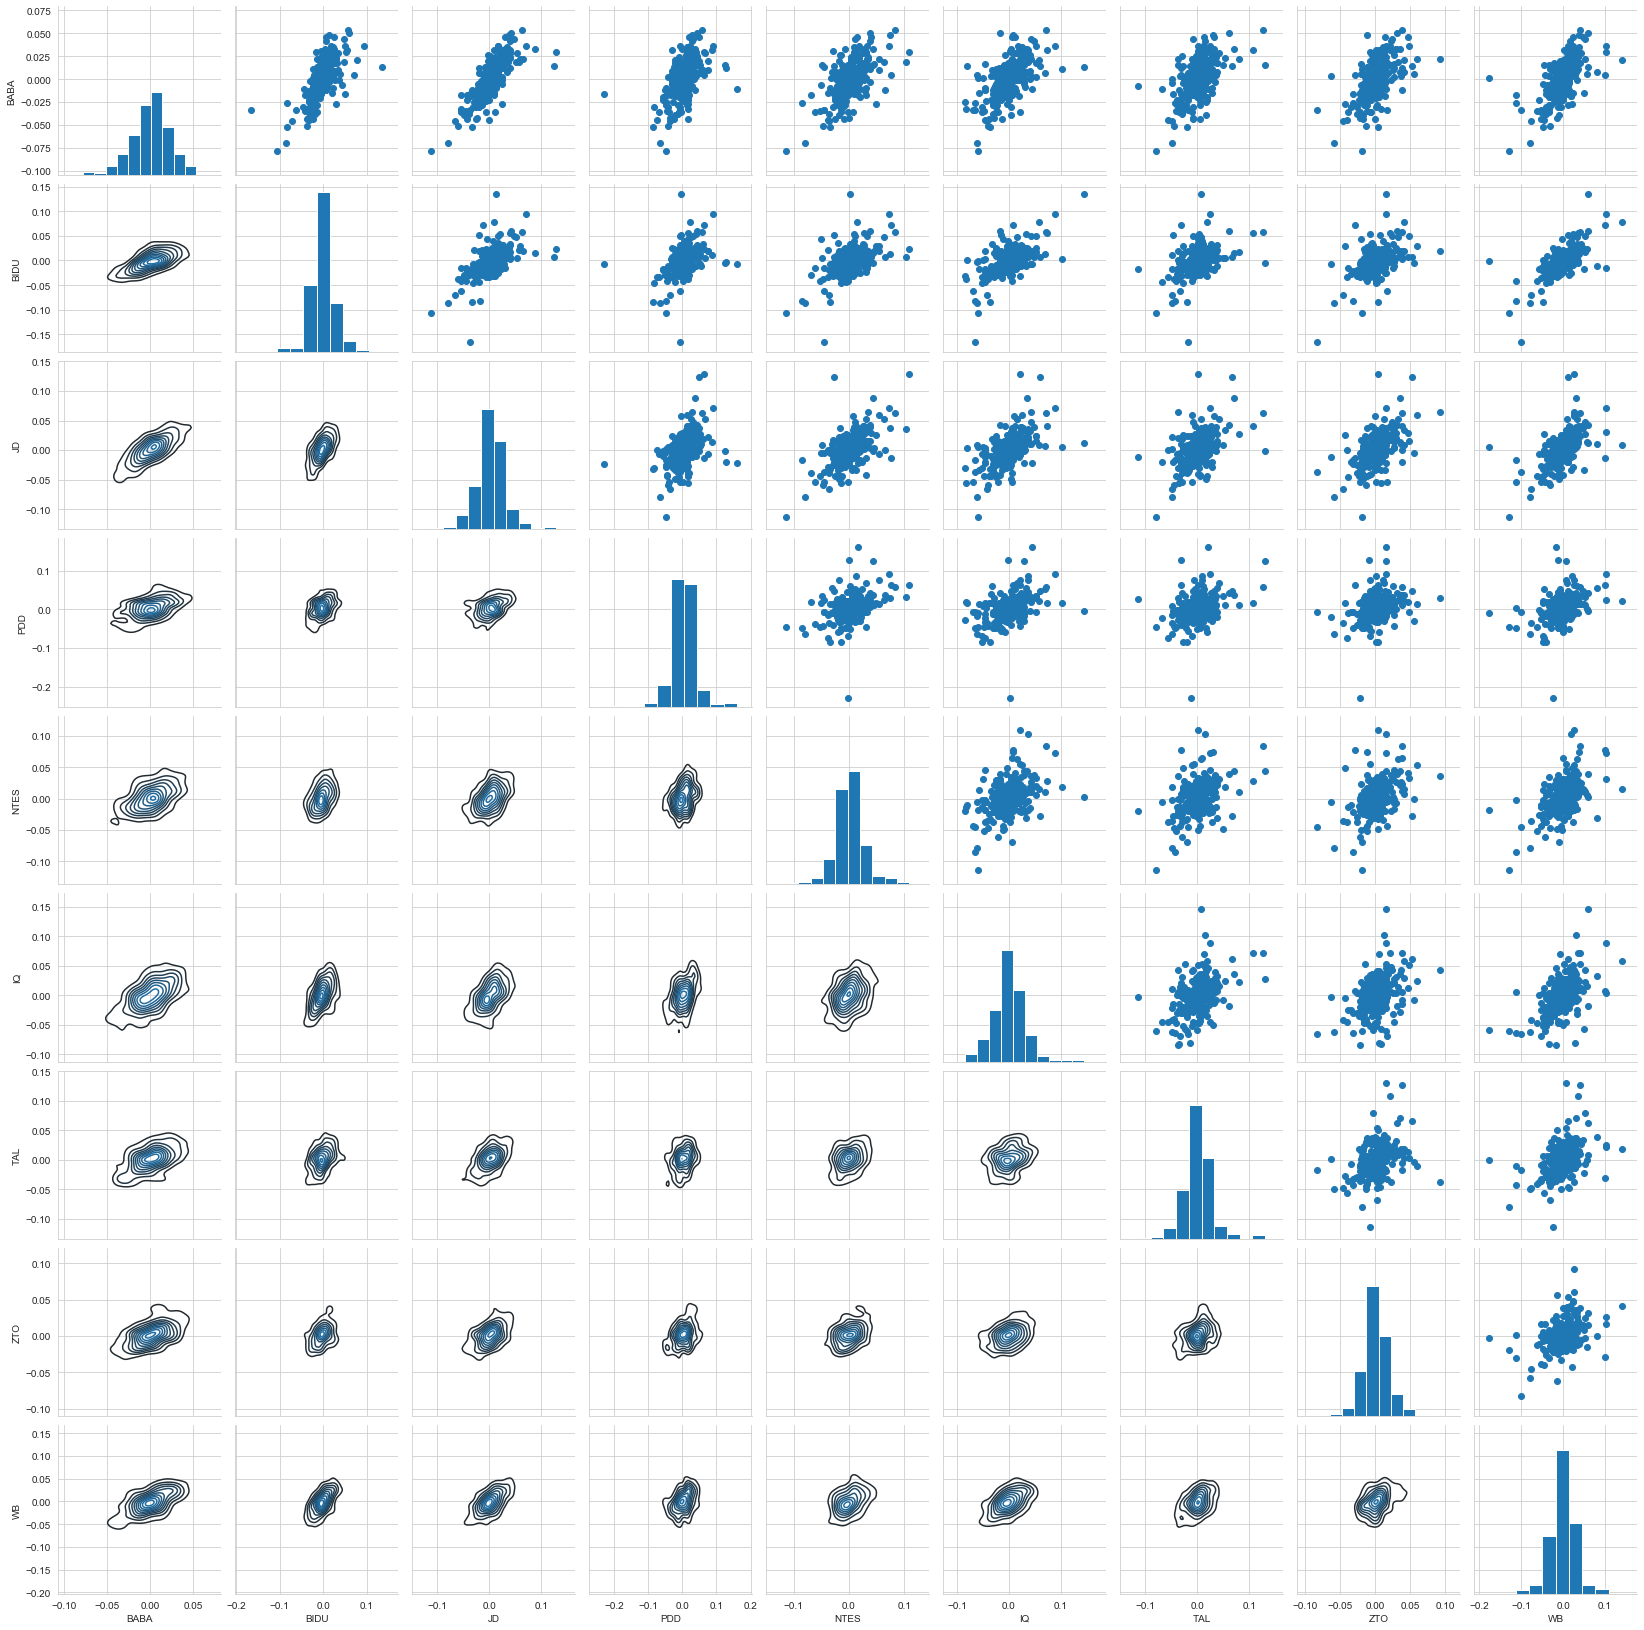

In [25]:
#We can also customize different types of plots
returns_fig = sns.PairGrid(chinese_stock_returns.dropna())

returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist)

In [29]:
rets = chinese_stock_returns.dropna()

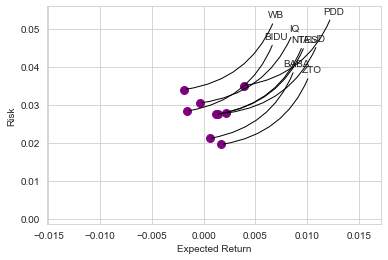

In [73]:
#Show the relationship between Expected Return and Risk
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area,color='purple')
plt.xlabel('Expected Return')
plt.ylabel('Risk')

#Labeling
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 70),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color= 'black'))


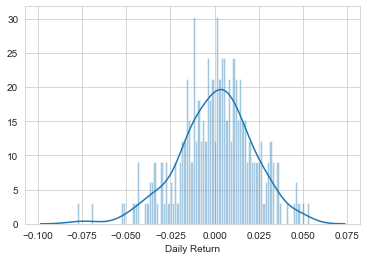

In [74]:
sns.distplot(BABA['Daily Return'].dropna(),bins=100)

In [75]:
#Show the Value at Risk(VaR)
rets['BABA'].quantile(0.05)

-0.03594121534306988

In [77]:
#Use the Monte Carlo method to calculate VaR

#Δ𝑆=𝑆(𝜇Δ𝑡+𝜎𝜖*sqrt(Δ𝑡))

#Time horizon
days = 365

#Δ𝑡
dt = 1/days

#𝜇
mu = rets.mean()['BABA']

#𝜎
sigma = rets.std()['BABA']

In [91]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt)) 
        
        drift[x] = mu*dt
        
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [96]:
BABA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-04-26,188.740005,185.509995,187.880005,187.089996,9421100,187.089996,NaN,NaN,NaN,NaN
2019-04-29,188.000000,185.759995,187.419998,186.940002,8660600,186.940002,NaN,NaN,NaN,-0.000802
2019-04-30,188.250000,183.820007,186.300003,185.570007,15076500,185.570007,NaN,NaN,NaN,-0.007329
2019-05-01,193.195007,185.880005,186.750000,189.309998,17397500,189.309998,NaN,NaN,NaN,0.020154
2019-05-02,192.699997,186.649994,189.419998,190.389999,11468100,190.389999,NaN,NaN,NaN,0.005705


Text(0.5, 1.0, 'Monte Carlo Analysis for Alibaba')

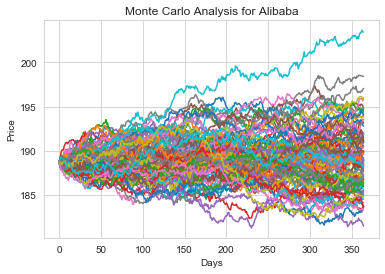

In [97]:
start_price=188.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Alibaba')

In [98]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

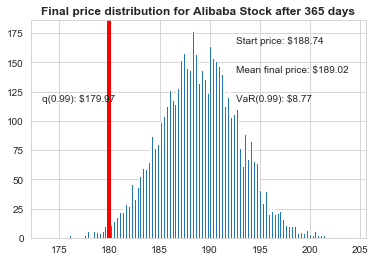

In [115]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: ${}" .format(start_price))
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: ${0:.2f}".format(simulations.mean()))

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): ${0:.2f}" .format(start_price - q,))
# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): ${0:.2f}" .format(q))

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Alibaba Stock after {} days" .format(days), weight='bold');